# 反向傳遞(Backpropagation, BP)
**BP是一種結合梯度下降法更新神經網路權重的方法。**

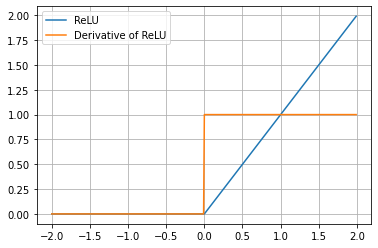

In [4]:
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, x, 0)
plt.plot(x, y, label='ReLU')
plt.grid(True)
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, 1, 0)
plt.plot(x, y, label='Derivative of ReLU')
plt.grid(True)
plt.legend(loc='upper left')

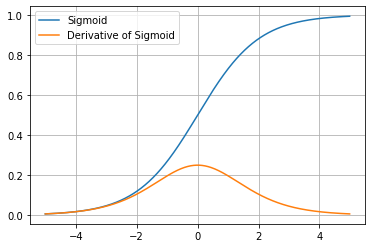

In [5]:
x1 = np.arange(-5, 5, 0.01)
y1 = 1 / (1 + np.exp(-x1))
plt.plot(x1, y1, label='Sigmoid')
plt.grid(True)
x2 = np.arange(-5, 5, 0.01)
y2 = (1 / (1 + np.exp(-x2))) * (1 - (1 / (1 + np.exp(-x2))))
plt.plot(x2, y2, label='Derivative of Sigmoid')
plt.grid(True)
plt.legend(loc='upper left')

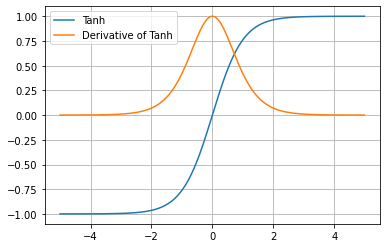

In [6]:
x = np.arange(-5, 5, 0.01)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x, y, label='Tanh')
plt.grid(True)
x = np.arange(-5, 5, 0.01)
y = 1 - np.square((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))
plt.plot(x, y, label='Derivative of Tanh')
plt.grid(True)
plt.legend(loc='upper left')

## Sigmoid梯度消失問題
ex. 以下為兩層的NN，每層都用Sigmoid。以知**輸入(x=0.4)**、**權重(w1=1、w2=1)**、和**預期輸出(y=1)**。
  
x --w1--> | h1 --sigmoid--> h2 | --w2--> | h3 --sigmoid--> y' | ----> Loss Function  
**h1** = xw1 = **0.4**, **h2** = s(h1) = **0.599**, **h3** = h2w2 = **0.599**, **y'** = s(h3) = **0.645**, **L** = (y - y')^2 = **0.126**  
**透過BP: ∂L / ∂w1**  
可得到: -0.0156  
根據BP的推算，可以看到每經過一個Sigmoid函數，至少會衰減0.25倍，最後造成梯度消失問題。

In [7]:
import tensorflow as tf
x = 0.4
w1, w2 = tf.Variable(1.0), tf.Variable(1.0)
y = 1
with tf.GradientTape() as tape:
    h1 = x * w1
    h2 = tf.sigmoid(h1)
    h3 = h2 * w2
    y_hat = tf.sigmoid(h3)
    loss = (y - y_hat)**2
gradients = tape.gradient(loss, w1)
print(gradients)

tf.Tensor(-0.015601176, shape=(), dtype=float32)


# 權重初始化
**神經網路的權重初始化對網路訓練非常重要，通常會影響到訓練是否成功。有三種權重初始化的方法，「常態分佈初始化」、「Xavier/Glorot初始化」及「He初始化」。**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

## 常態分佈初始化
#### 標準差為1的常態分佈和Sigmoid激勵函數的網路模型

In [9]:
inputs = keras.Input((100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x4)
model_1 = keras.Model(inputs, [x1, x2, x3, x4, x5])
model_1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               10000     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10000     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10000     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10000     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10000     
Total params: 50,000
Trainable params: 50,000
Non-trainable params: 0
__________________________________________________

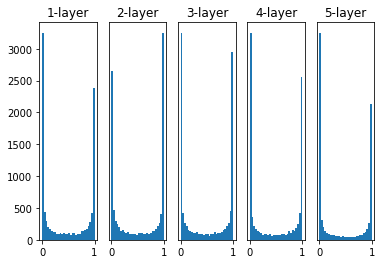

In [10]:
# 顯示每層網路的輸出分佈
x = np.random.rand(100, 100)
outputs = model_1.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1) # 選擇在表中哪個格子裡
    plt.title(str(i+1) + "-layer") # 直方圖標題
    if i != 0: plt.yticks([], []) # 只顯示第一列直方圖y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1]) # 畫出直方圖
plt.show()

可以看到大部分的輸出介於0與1附近，但在做BP運算時，傳遞值會趨近為0，所以「標準差為1的常態分佈」不是很好。

#### 標準差為0.01的常態分佈和Sigmoid激勵函數的網路模型

In [11]:
inputs = keras.Input((100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x4)
model_2 = keras.Model(inputs, [x1, x2, x3, x4, x5])
model_2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10000     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10000     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10000     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10000     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10000     
Total params: 50,000
Trainable params: 50,000
Non-trainable params: 0
__________________________________________________

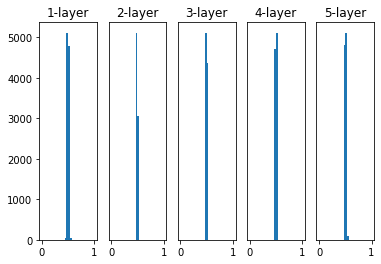

In [12]:
# 顯示每層網路的輸出分佈
x = np.random.rand(100, 100)
outputs = model_2.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(layer_output.flatten(), 30, range=[0,1])
plt.show()

可以看到大部分的輸出為於0.5附近，在做BP運算時，傳遞值會趨近為0.25附近，所以「標準差為0.01的常態分佈」可以改善「標準差為1的常態分佈」梯度消失的問題。但如建構太多網路層，還是會有梯度消失問題會發生。

## Xavier/Glorot初始化
它被應用在許多深度學習框架，並被當作預設的權重初始方式，如Keras。
#### Xavier/Glorot初始化和Sigmoid激勵函數的網路模型

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10000     
Total params: 50,000
Trainable params: 50,000
Non-trainable params: 0
__________________________________________________

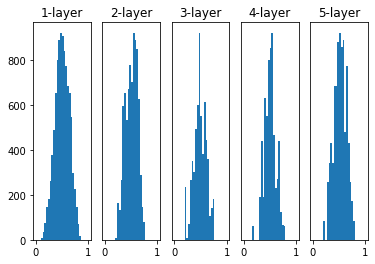

In [13]:
inputs = keras.Input((100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x4)
model_3 = keras.Model(inputs, [x1, x2, x3, x4, x5])
model_3.summary()
# 顯示每層網路的輸出分佈
x = np.random.rand(100, 100)
outputs = model_3.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(layer_output.flatten(), 30, range=[0,1])
plt.show()

「Xavier/Glorot初始化」相比「標準差為0.01的常態分佈」，前者的輸出更廣，增加網路的多樣性。所以在激勵函數Sigmoid或Tanh時，推薦使用此方法。雖此方法有所改善，但還是有梯度衰減的問題，所以激勵函數還是推薦使用ReLU。

#### Xavier/Glorot初始化和ReLU激勵函數的網路模型

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10000     
Total params: 50,000
Trainable params: 50,000
Non-trainable params: 0
__________________________________________________

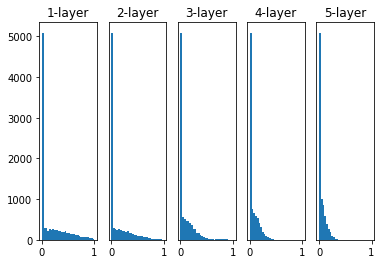

In [14]:
inputs = keras.Input((100,))
x1 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x4)
model_4 = keras.Model(inputs, [x1, x2, x3, x4, x5])
model_4.summary()
# 顯示每層網路的輸出分佈
x = np.random.rand(100, 100)
outputs = model_4.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(layer_output.flatten(), 30, range=[0,1])
plt.show()

從上圖觀察，隨著層數增加其輸出分佈會往0靠近，如此有可能會有梯度消失的問題。所以使用「Xavier/Glorot初始化」和ReLU函數時，不能搭建太深的網路。

## He 初始化
為Xavier/Glorot初始化的變形，能夠解決Glorot初始化和ReLU函數的問題。
#### He 初始化和ReLU激勵函數的網路模型

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10000     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10000     
Total params: 50,000
Trainable params: 50,000
Non-trainable params: 0
__________________________________________________

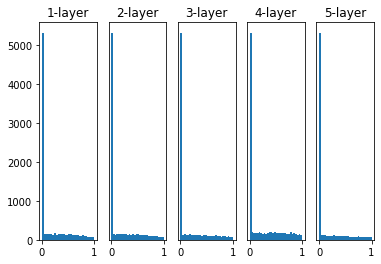

In [15]:
inputs = keras.Input((100,))
x1 = layers.Dense(100, 'relu', False, initializers.he_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.he_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.he_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.he_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.he_normal())(x4)
model_5 = keras.Model(inputs, [x1, x2, x3, x4, x5])
model_5.summary()
# 顯示每層網路的輸出分佈
x = np.random.rand(100, 100)
outputs = model_5.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(layer_output.flatten(), 30, range=[0,1])
plt.show()

從上圖觀察，可以明顯看出隨著深度增加，其輸出還是分佈平均。

# 批次初始化(Batch Normalization)
Batch Normalization就是強制讓每一層輸出分佈平均。
## Batch Normalization介紹
是Google推出的對網路層輸出做標準化的演算法，不僅能讓網路的「收斂速度加快」，還能一定程度緩解「梯度消失」和「梯度爆炸」的問題，進而讓網路訓練更加容易和穩定。現在大部分的網路架構都會使用Batch Normalization，基本成為必要的方法。  
其核心思想在於**對輸入的每一批(Batch)資料，在每一層的輸出都做標準化(Normalization)**。例: 網路輸出分佈在[-10,10]間，經過Tanh會集中在-1和1附近。如果在網路輸出層做標準化使其分佈在[-2,2]間，經過Tanh後，輸出分佈會更為平均在[-1,1]中。

Batch Normalization除了解決梯度消失問題外，也解決了**Internal Covariate Shift**問題。  
**Internal Covariate Shift：**當NN更新權重後，網路層的輸出分佈會產生變化。因為輸出分佈的變化，後一層的網路要不斷適應前一層的輸出分佈變化，而每一層都是環環相扣的，所以其中一層變化太大，後面就會更不上，訓練會出現問題。  
以往的做法是減少學習率，而Batch Normalization方法是讓輸出分佈較固定，因此可以緩解Internal Covariate Shift的問題，所以也能加大學習率，增加訓練速度。以下是其優點：  
**。不仰賴權重初始化**  
**。減少梯度消失或梯度爆炸**  
**。避免過擬合(可以減少使用Dropout、Regularization)**  
**。加快學習速度**

## Batch Normalization的網路架構
Batch Normalization的位置通常位於**卷積層與激勵函數間**。
```
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
替換成
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
```

# 實驗一：使用CIFAR-10資料集實驗三種權重初始化方法
**分別是「常態分佈(std=0.01)初始化」、「Glorot初始化」和「He初始化」**

In [16]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from preprocessing import parse_aug_fn, parse_fn

In [17]:
# 載入 CIFAR-10資料集
train_split, valid_split = ["train[:90%]", "train[90:]"] # 訓練:驗證 = 9:1
train_data, info = tfds.load("cifar10", split=train_split, with_info=True) # 讀取訓練資料及Data的資訊
valid_data = tfds.load("cifar10", split=valid_split) # 讀取驗證資料
test_data = tfds.load("cifar10", split="test")

In [18]:
info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # 自行調整模式
batch_size = 128 # 批次大小
train_num = int(info.splits['train'].num_examples / 10) * 9 # 訓練資料數量

In [20]:
# 打散資料
train_data = train_data.shuffle(train_num)
# 載入預處理 parse_aug_fn()，CPU數量為自動調整模式
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小，並將 prefetch 模式打開(暫存空間為自動調整模式)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)
# 載入預處理 parse_fn()，CPU數量為自動調整模式
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)
# 載入預處理 parse_fn()，CPU數量為自動調整模式
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [21]:
# 建立模型和訓練任務
def build_and_train_model(task, init):
    """
    task: 任務名稱
    init: 初始化方式
    """
    # 建立模型
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu', kernel_initializer=init)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    # 建立資料夾
    model_dir = './models/Ch5/'
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    # 設定Optimizer、Loss Function、Metrics Function
    model.compile(keras.optimizers.Adam(),
                  loss=keras.losses.CategoricalCrossentropy(),
                  metrics=[keras.metrics.CategoricalAccuracy()]
                 )

    # 儲存訓練記錄檔
    log_dir = './models/Ch5/{}-{}'.format(task, init.__class__.__name__)
    # 儲存各權重分佈，histogram_freq=1表示會將每個epoch各層的網路權重分佈記錄下來
    model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    # 儲存最好的網路模型權重
    modelfiles = model_dir + '{}-best-model.h5'.format(task)
    model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                                 monitor='val_categorical_accuracy',
                                                 save_best_only=True,
                                                 mode='max')
    # 開始訓練
    model.fit(train_data,
              epochs=100,
              validation_data=valid_data,
              callbacks=[model_cbk, model_mckp]
              )

In [22]:
session_num = 1
# 設定要測試的三種權重初始化方式
weights_initialization_list = [initializers.RandomNormal(0, 0.01),
                               initializers.glorot_normal(),
                               initializers.he_normal()]
for init in weights_initialization_list:
    print('---第{}次訓練---'.format(session_num))
    task = 'run-{}'.format(session_num)
    build_and_train_model(task, init)
    session_num += 1

---第1次訓練---
Epoch 1/100
  1/352 [..............................] - ETA: 0s - loss: 2.3026 - categorical_accuracy: 0.0859WARNING:tensorflow:From C:\Users\a7032\AI_Deep_Learing\Tensorflow2\tf2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


  2/352 [..............................] - ETA: 15s - loss: 2.3026 - categorical_accuracy: 0.0938WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0090s vs `on_train_batch_end` time: 0.0801s). Check your callbacks.


352/352 [==============================] - 10s 28ms/step - loss: 2.3028 - categorical_accuracy: 0.0972 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 2/100
352/352 [==============================] - 9s 25ms/step - loss: 2.3027 - categorical_accuracy: 0.0983 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 3/100
352/352 [==============================] - 9s 25ms/step - loss: 2.3027 - categorical_accuracy: 0.0992 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 4/100
352/352 [==============================] - 9s 25ms/step - loss: 2.3027 - categorical_accuracy: 0.0993 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 5/100
352/352 [==============================] - 9s 25ms/step - loss: 2.3027 - categorical_accuracy: 0.0974 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 6/100
352/352 [==============================] - 9s 25ms/step - loss: 2.3027 - categorical_accuracy: 0.0974 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epo

352/352 [==============================] - 9s 24ms/step - loss: 2.3027 - categorical_accuracy: 0.0977 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 50/100
352/352 [==============================] - 9s 24ms/step - loss: 2.3027 - categorical_accuracy: 0.0975 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 51/100
352/352 [==============================] - 9s 24ms/step - loss: 2.3027 - categorical_accuracy: 0.0982 - val_loss: 2.3026 - val_categorical_accuracy: 0.0999
Epoch 52/100
352/352 [==============================] - 9s 24ms/step - loss: 2.3027 - categorical_accuracy: 0.0967 - val_loss: 2.3026 - val_categorical_accuracy: 0.1001
Epoch 53/100
352/352 [==============================] - 8s 24ms/step - loss: 2.3027 - categorical_accuracy: 0.0984 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000
Epoch 54/100
352/352 [==============================] - 9s 25ms/step - loss: 2.3027 - categorical_accuracy: 0.0961 - val_loss: 2.3026 - val_categorical_accuracy: 0.1000

352/352 [==============================] - 8s 24ms/step - loss: 2.3027 - categorical_accuracy: 0.0984 - val_loss: 2.3026 - val_categorical_accuracy: 0.1001
Epoch 98/100
352/352 [==============================] - 8s 24ms/step - loss: 2.3027 - categorical_accuracy: 0.0982 - val_loss: 2.3026 - val_categorical_accuracy: 0.1001
Epoch 99/100
352/352 [==============================] - 8s 24ms/step - loss: 2.3027 - categorical_accuracy: 0.0981 - val_loss: 2.3026 - val_categorical_accuracy: 0.1001
Epoch 100/100
352/352 [==============================] - 8s 24ms/step - loss: 2.3027 - categorical_accuracy: 0.0968 - val_loss: 2.3026 - val_categorical_accuracy: 0.1001
---第2次訓練---
Epoch 1/100
  2/352 [..............................] - ETA: 16s - loss: 2.3344 - categorical_accuracy: 0.0859WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0085s vs `on_train_batch_end` time: 0.0776s). Check your callbacks.


352/352 [==============================] - 9s 25ms/step - loss: 2.0919 - categorical_accuracy: 0.2165 - val_loss: 1.7533 - val_categorical_accuracy: 0.3642
Epoch 2/100
352/352 [==============================] - 9s 24ms/step - loss: 1.8568 - categorical_accuracy: 0.3182 - val_loss: 1.5745 - val_categorical_accuracy: 0.4414
Epoch 3/100
352/352 [==============================] - 9s 25ms/step - loss: 1.7492 - categorical_accuracy: 0.3616 - val_loss: 1.4634 - val_categorical_accuracy: 0.4940
Epoch 4/100
352/352 [==============================] - 8s 24ms/step - loss: 1.6532 - categorical_accuracy: 0.4022 - val_loss: 1.3945 - val_categorical_accuracy: 0.4985
Epoch 5/100
352/352 [==============================] - 8s 24ms/step - loss: 1.5866 - categorical_accuracy: 0.4247 - val_loss: 1.2674 - val_categorical_accuracy: 0.5579
Epoch 6/100
352/352 [==============================] - 8s 24ms/step - loss: 1.5211 - categorical_accuracy: 0.4572 - val_loss: 1.2376 - val_categorical_accuracy: 0.5469
Epoc

352/352 [==============================] - 8s 24ms/step - loss: 0.8441 - categorical_accuracy: 0.7177 - val_loss: 0.5044 - val_categorical_accuracy: 0.8291
Epoch 50/100
352/352 [==============================] - 8s 24ms/step - loss: 0.8491 - categorical_accuracy: 0.7160 - val_loss: 0.4440 - val_categorical_accuracy: 0.8495
Epoch 51/100
352/352 [==============================] - 9s 24ms/step - loss: 0.8318 - categorical_accuracy: 0.7211 - val_loss: 0.4559 - val_categorical_accuracy: 0.8440
Epoch 52/100
352/352 [==============================] - 8s 24ms/step - loss: 0.8324 - categorical_accuracy: 0.7200 - val_loss: 0.4815 - val_categorical_accuracy: 0.8386
Epoch 53/100
352/352 [==============================] - 8s 24ms/step - loss: 0.8309 - categorical_accuracy: 0.7225 - val_loss: 0.4298 - val_categorical_accuracy: 0.8536
Epoch 54/100
352/352 [==============================] - 8s 24ms/step - loss: 0.8231 - categorical_accuracy: 0.7265 - val_loss: 0.4702 - val_categorical_accuracy: 0.8404

352/352 [==============================] - 8s 24ms/step - loss: 0.6918 - categorical_accuracy: 0.7724 - val_loss: 0.3101 - val_categorical_accuracy: 0.8988
Epoch 98/100
352/352 [==============================] - 8s 24ms/step - loss: 0.6924 - categorical_accuracy: 0.7699 - val_loss: 0.3120 - val_categorical_accuracy: 0.8964
Epoch 99/100
352/352 [==============================] - 8s 24ms/step - loss: 0.6829 - categorical_accuracy: 0.7721 - val_loss: 0.3181 - val_categorical_accuracy: 0.8924
Epoch 100/100
352/352 [==============================] - 8s 24ms/step - loss: 0.6880 - categorical_accuracy: 0.7717 - val_loss: 0.3217 - val_categorical_accuracy: 0.8917
---第3次訓練---
Epoch 1/100
  2/352 [..............................] - ETA: 15s - loss: 2.8754 - categorical_accuracy: 0.0898WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0085s vs `on_train_batch_end` time: 0.0741s). Check your callbacks.


352/352 [==============================] - 9s 24ms/step - loss: 2.1064 - categorical_accuracy: 0.2180 - val_loss: 1.8117 - val_categorical_accuracy: 0.3600
Epoch 2/100
352/352 [==============================] - 8s 24ms/step - loss: 1.8877 - categorical_accuracy: 0.2997 - val_loss: 1.5903 - val_categorical_accuracy: 0.4221
Epoch 3/100
352/352 [==============================] - 8s 24ms/step - loss: 1.7748 - categorical_accuracy: 0.3518 - val_loss: 1.4222 - val_categorical_accuracy: 0.4931
Epoch 4/100
352/352 [==============================] - 8s 24ms/step - loss: 1.6689 - categorical_accuracy: 0.3937 - val_loss: 1.4565 - val_categorical_accuracy: 0.4815
Epoch 5/100
352/352 [==============================] - 9s 24ms/step - loss: 1.5859 - categorical_accuracy: 0.4314 - val_loss: 1.1901 - val_categorical_accuracy: 0.5746
Epoch 6/100
352/352 [==============================] - 9s 24ms/step - loss: 1.5061 - categorical_accuracy: 0.4648 - val_loss: 1.1854 - val_categorical_accuracy: 0.5735
Epoc

352/352 [==============================] - 8s 24ms/step - loss: 0.7933 - categorical_accuracy: 0.7371 - val_loss: 0.4052 - val_categorical_accuracy: 0.8649
Epoch 50/100
352/352 [==============================] - 8s 24ms/step - loss: 0.7850 - categorical_accuracy: 0.7386 - val_loss: 0.4170 - val_categorical_accuracy: 0.8570
Epoch 51/100
352/352 [==============================] - 8s 24ms/step - loss: 0.7842 - categorical_accuracy: 0.7397 - val_loss: 0.4062 - val_categorical_accuracy: 0.8653
Epoch 52/100
352/352 [==============================] - 8s 24ms/step - loss: 0.7769 - categorical_accuracy: 0.7436 - val_loss: 0.3648 - val_categorical_accuracy: 0.8778
Epoch 53/100
352/352 [==============================] - 8s 24ms/step - loss: 0.7693 - categorical_accuracy: 0.7460 - val_loss: 0.3957 - val_categorical_accuracy: 0.8691
Epoch 54/100
352/352 [==============================] - 8s 24ms/step - loss: 0.7696 - categorical_accuracy: 0.7414 - val_loss: 0.3720 - val_categorical_accuracy: 0.8723

352/352 [==============================] - 9s 25ms/step - loss: 0.6499 - categorical_accuracy: 0.7874 - val_loss: 0.2773 - val_categorical_accuracy: 0.9118
Epoch 98/100
352/352 [==============================] - 8s 24ms/step - loss: 0.6404 - categorical_accuracy: 0.7888 - val_loss: 0.2731 - val_categorical_accuracy: 0.9117
Epoch 99/100
352/352 [==============================] - 8s 24ms/step - loss: 0.6383 - categorical_accuracy: 0.7910 - val_loss: 0.2674 - val_categorical_accuracy: 0.9118
Epoch 100/100
352/352 [==============================] - 8s 24ms/step - loss: 0.6430 - categorical_accuracy: 0.7890 - val_loss: 0.2492 - val_categorical_accuracy: 0.9183


In [23]:
model_1 = keras.models.load_model('./models/Ch5/run-1-best-model.h5')
model_2 = keras.models.load_model('./models/Ch5/run-2-best-model.h5')
model_3 = keras.models.load_model('./models/Ch5/run-3-best-model.h5')

In [24]:
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)

79/79 [==============================] - 0s 6ms/step - loss: 0.5654 - categorical_accuracy: 0.8201


In [25]:
loss = [loss_1, loss_2, loss_3]
acc = [acc_1, acc_2, acc_3]
dict = {"Accuracy":acc, "Loss":loss}
pd.DataFrame(dict)

,Accuracy,Loss
0,0.1000,2.302599
1,0.8186,0.559934
2,0.8201,0.565363


# TensorBoard 視覺化權重分佈
model_cbk的**histogram_freq=1**表示會將每個epoch各層的網路權重分佈記錄下來，所以可以用「DISTRIBUTIONS」和「HISTOGRAMS」兩個可視化工具查看分佈變化。

In [26]:
%load_ext tensorboard
%tensorboard --logdir models/Ch5

# 實驗二：使用CIFAR-10資料集實驗Batch Normalization方法

In [28]:
# 建立模型
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3))(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(256, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(64, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_4 = keras.Model(inputs, outputs)
model_4.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 128)     

In [31]:
# 設定Optimizer、Loss Function、Metrics Function
model_4.compile(keras.optimizers.Adam(),
                loss=keras.losses.CategoricalCrossentropy(),
                metrics=[keras.metrics.CategoricalAccuracy()])

# 儲存訓練記錄檔
log_dir = './models/Ch5/run-4-batchnormalization'
# 儲存各權重分佈，histogram_freq=1表示會將每個epoch各層的網路權重分佈記錄下來
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_dir = './models/Ch5/'
modelfiles = model_dir + 'run-4-best-model.h5'
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_categorical_accuracy',
                                             save_best_only=True,
                                             mode='max')
# 開始訓練
hitstory = model_4.fit(train_data,
                       epochs=100,
                       validation_data=valid_data,
                       callbacks=[model_cbk, model_mckp])

Epoch 1/100
  2/352 [..............................] - ETA: 29s - loss: 2.8771 - categorical_accuracy: 0.0977WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0125s vs `on_train_batch_end` time: 0.1471s). Check your callbacks.


352/352 [==============================] - 11s 32ms/step - loss: 1.8932 - categorical_accuracy: 0.3202 - val_loss: 2.0985 - val_categorical_accuracy: 0.2029
Epoch 2/100
352/352 [==============================] - 11s 33ms/step - loss: 1.5450 - categorical_accuracy: 0.4518 - val_loss: 1.8432 - val_categorical_accuracy: 0.3713
Epoch 3/100
352/352 [==============================] - 11s 32ms/step - loss: 1.3701 - categorical_accuracy: 0.5208 - val_loss: 1.3942 - val_categorical_accuracy: 0.5263
Epoch 4/100
352/352 [==============================] - 11s 31ms/step - loss: 1.2656 - categorical_accuracy: 0.5604 - val_loss: 1.4144 - val_categorical_accuracy: 0.5140
Epoch 5/100
352/352 [==============================] - 11s 33ms/step - loss: 1.1944 - categorical_accuracy: 0.5852 - val_loss: 0.9648 - val_categorical_accuracy: 0.6579
Epoch 6/100
352/352 [==============================] - 11s 32ms/step - loss: 1.1257 - categorical_accuracy: 0.6128 - val_loss: 0.9508 - val_categorical_accuracy: 0.659

352/352 [==============================] - 11s 31ms/step - loss: 0.5237 - categorical_accuracy: 0.8296 - val_loss: 0.2428 - val_categorical_accuracy: 0.9173
Epoch 50/100
352/352 [==============================] - 11s 31ms/step - loss: 0.5223 - categorical_accuracy: 0.8293 - val_loss: 0.3480 - val_categorical_accuracy: 0.8793
Epoch 51/100
352/352 [==============================] - 11s 31ms/step - loss: 0.5239 - categorical_accuracy: 0.8290 - val_loss: 0.3839 - val_categorical_accuracy: 0.8730
Epoch 52/100
352/352 [==============================] - 11s 31ms/step - loss: 0.5082 - categorical_accuracy: 0.8356 - val_loss: 0.2833 - val_categorical_accuracy: 0.9051
Epoch 53/100
352/352 [==============================] - 11s 31ms/step - loss: 0.5164 - categorical_accuracy: 0.8300 - val_loss: 0.3674 - val_categorical_accuracy: 0.8750
Epoch 54/100
352/352 [==============================] - 11s 31ms/step - loss: 0.5083 - categorical_accuracy: 0.8325 - val_loss: 0.2871 - val_categorical_accuracy: 

352/352 [==============================] - 11s 31ms/step - loss: 0.4022 - categorical_accuracy: 0.8705 - val_loss: 0.2233 - val_categorical_accuracy: 0.9263
Epoch 98/100
352/352 [==============================] - 11s 31ms/step - loss: 0.4023 - categorical_accuracy: 0.8703 - val_loss: 0.1596 - val_categorical_accuracy: 0.9484
Epoch 99/100
352/352 [==============================] - 11s 31ms/step - loss: 0.3948 - categorical_accuracy: 0.8730 - val_loss: 0.1877 - val_categorical_accuracy: 0.9375
Epoch 100/100
352/352 [==============================] - 11s 31ms/step - loss: 0.3902 - categorical_accuracy: 0.8739 - val_loss: 0.2015 - val_categorical_accuracy: 0.9323


In [32]:
model_4 = keras.models.load_model('./models/Ch5/run-4-best-model.h5')
loss_4, acc_4 = model_4.evaluate(test_data)

79/79 [==============================] - 1s 8ms/step - loss: 0.4173 - categorical_accuracy: 0.8656


In [33]:
loss = [loss_1, loss_2, loss_3, loss_4]
acc = [acc_1, acc_2, acc_3, acc_4]
dict = {"Accuracy":acc, "Loss":loss}
pd.DataFrame(dict)

,Accuracy,Loss
0,0.1000,2.302599
1,0.8186,0.559934
2,0.8201,0.565363
3,0.8656,0.417265


In [34]:
%load_ext tensorboard
%tensorboard --logdir models/Ch5

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12512), started 0:20:09 ago. (Use '!kill 12512' to kill it.)